# Description

Runs k-means on the umap version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 20000

## Input data

In [7]:
INPUT_SUBSET = "umap"

In [8]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

## Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [13]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [14]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [15]:
display(len(CLUSTERERS))

295

In [16]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=20000))

('KMeans #1', KMeans(n_clusters=2, random_state=20001))

In [17]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [18]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [19]:
data = pd.read_pickle(input_filepath)

In [20]:
data.shape

(3752, 50)

In [21]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,9.587280,8.050184,9.340894,8.884522,4.562011,9.261327,9.078164,8.009141,9.288872,9.827831,...,9.753575,0.440851,-0.077164,-0.184829,9.345852,0.622542,-0.051136,4.266558,8.047482,-0.317385
100002_raw-Energy,9.910512,8.372274,9.605316,9.808598,4.641970,9.360196,8.848985,7.768594,9.231921,9.328465,...,9.647689,0.581584,0.547930,0.600128,8.976416,1.249645,0.234843,4.636343,7.173085,0.137119
100003_raw-Protein,9.923088,8.380640,9.609899,9.836457,4.647365,9.366775,8.835996,7.767549,9.230281,9.314386,...,9.642637,0.580362,0.565898,0.621073,8.967297,1.271435,0.243960,4.648671,7.149967,0.148192
100004_raw-Fat,9.898531,8.375697,9.600443,9.785713,4.639249,9.360721,8.886237,7.783376,9.237095,9.345434,...,9.648270,0.573073,0.521042,0.576926,8.979161,1.227988,0.231848,4.622777,7.205517,0.147385
100005_raw-Carbohydrate,9.895807,8.376662,9.605841,9.791338,4.636903,9.352356,8.867312,7.774787,9.233479,9.344456,...,9.652949,0.575161,0.529565,0.579919,8.988125,1.231771,0.226778,4.624360,7.194818,0.123104


In [22]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [23]:
from clustering.ensembles.utils import generate_ensemble

In [24]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<00:33,  8.85it/s]

  1%|          | 3/295 [00:00<00:31,  9.25it/s]

  2%|▏         | 5/295 [00:00<00:30,  9.51it/s]

  2%|▏         | 6/295 [00:00<00:31,  9.05it/s]

  2%|▏         | 7/295 [00:00<00:31,  9.01it/s]

  3%|▎         | 8/295 [00:00<00:33,  8.58it/s]

  3%|▎         | 9/295 [00:00<00:33,  8.46it/s]

  3%|▎         | 10/295 [00:01<00:35,  8.07it/s]

  4%|▎         | 11/295 [00:01<00:34,  8.21it/s]

  4%|▍         | 12/295 [00:01<00:36,  7.80it/s]

  4%|▍         | 13/295 [00:01<00:36,  7.80it/s]

  5%|▍         | 14/295 [00:01<00:34,  8.06it/s]

  5%|▌         | 15/295 [00:01<00:33,  8.27it/s]

  5%|▌         | 16/295 [00:01<00:36,  7.73it/s]

  6%|▌         | 17/295 [00:02<00:36,  7.60it/s]

  6%|▌         | 18/295 [00:02<00:38,  7.18it/s]

  6%|▋         | 19/295 [00:02<00:40,  6.78it/s]

  7%|▋         | 20/295 [00:02<00:41,  6.60it/s]

  7%|▋         | 21/295 [00:02<00:44,  6.23it/s]

  7%|▋         | 22/295 [00:02<00:43,  6.35it/s]

  8%|▊         | 23/295 [00:02<00:41,  6.52it/s]

  8%|▊         | 24/295 [00:03<00:42,  6.40it/s]

  8%|▊         | 25/295 [00:03<00:42,  6.36it/s]

  9%|▉         | 26/295 [00:03<00:43,  6.25it/s]

  9%|▉         | 27/295 [00:03<00:44,  6.00it/s]

  9%|▉         | 28/295 [00:03<00:44,  6.03it/s]

 10%|▉         | 29/295 [00:04<00:45,  5.88it/s]

 10%|█         | 30/295 [00:04<00:45,  5.88it/s]

 11%|█         | 31/295 [00:04<00:47,  5.61it/s]

 11%|█         | 32/295 [00:04<00:46,  5.69it/s]

 11%|█         | 33/295 [00:04<00:46,  5.67it/s]

 12%|█▏        | 34/295 [00:04<00:44,  5.82it/s]

 12%|█▏        | 35/295 [00:05<00:46,  5.59it/s]

 12%|█▏        | 36/295 [00:05<00:47,  5.41it/s]

 13%|█▎        | 37/295 [00:05<00:48,  5.30it/s]

 13%|█▎        | 38/295 [00:05<00:48,  5.30it/s]

 13%|█▎        | 39/295 [00:05<00:47,  5.37it/s]

 14%|█▎        | 40/295 [00:06<00:50,  5.04it/s]

 14%|█▍        | 41/295 [00:06<00:54,  4.70it/s]

 14%|█▍        | 42/295 [00:06<00:59,  4.27it/s]

 15%|█▍        | 43/295 [00:06<00:59,  4.25it/s]

 15%|█▍        | 44/295 [00:07<00:58,  4.31it/s]

 15%|█▌        | 45/295 [00:07<00:58,  4.27it/s]

 16%|█▌        | 46/295 [00:07<00:59,  4.15it/s]

 16%|█▌        | 47/295 [00:07<00:58,  4.25it/s]

 16%|█▋        | 48/295 [00:08<00:57,  4.30it/s]

 17%|█▋        | 49/295 [00:08<00:57,  4.31it/s]

 17%|█▋        | 50/295 [00:08<00:57,  4.30it/s]

 17%|█▋        | 51/295 [00:08<00:59,  4.09it/s]

 18%|█▊        | 52/295 [00:08<00:58,  4.16it/s]

 18%|█▊        | 53/295 [00:09<01:00,  4.00it/s]

 18%|█▊        | 54/295 [00:09<01:00,  3.95it/s]

 19%|█▊        | 55/295 [00:09<01:02,  3.83it/s]

 19%|█▉        | 56/295 [00:10<01:02,  3.85it/s]

 19%|█▉        | 57/295 [00:10<01:03,  3.76it/s]

 20%|█▉        | 58/295 [00:10<01:02,  3.81it/s]

 20%|██        | 59/295 [00:10<01:02,  3.79it/s]

 20%|██        | 60/295 [00:11<01:02,  3.74it/s]

 21%|██        | 61/295 [00:11<01:03,  3.68it/s]

 21%|██        | 62/295 [00:11<01:03,  3.64it/s]

 21%|██▏       | 63/295 [00:11<01:04,  3.62it/s]

 22%|██▏       | 64/295 [00:12<01:05,  3.51it/s]

 22%|██▏       | 65/295 [00:12<01:07,  3.42it/s]

 22%|██▏       | 66/295 [00:12<01:09,  3.31it/s]

 23%|██▎       | 67/295 [00:13<01:08,  3.32it/s]

 23%|██▎       | 68/295 [00:13<01:09,  3.27it/s]

 23%|██▎       | 69/295 [00:13<01:08,  3.30it/s]

 24%|██▎       | 70/295 [00:14<01:08,  3.29it/s]

 24%|██▍       | 71/295 [00:14<01:08,  3.27it/s]

 24%|██▍       | 72/295 [00:14<01:09,  3.20it/s]

 25%|██▍       | 73/295 [00:15<01:10,  3.14it/s]

 25%|██▌       | 74/295 [00:15<01:09,  3.20it/s]

 25%|██▌       | 75/295 [00:15<01:09,  3.16it/s]

 26%|██▌       | 76/295 [00:16<01:10,  3.11it/s]

 26%|██▌       | 77/295 [00:16<01:09,  3.15it/s]

 26%|██▋       | 78/295 [00:16<01:08,  3.17it/s]

 27%|██▋       | 79/295 [00:17<01:09,  3.11it/s]

 27%|██▋       | 80/295 [00:17<01:09,  3.09it/s]

 27%|██▋       | 81/295 [00:17<01:10,  3.02it/s]

 28%|██▊       | 82/295 [00:18<01:12,  2.95it/s]

 28%|██▊       | 83/295 [00:18<01:11,  2.97it/s]

 28%|██▊       | 84/295 [00:18<01:12,  2.91it/s]

 29%|██▉       | 85/295 [00:19<01:12,  2.91it/s]

 29%|██▉       | 86/295 [00:19<01:11,  2.90it/s]

 29%|██▉       | 87/295 [00:19<01:14,  2.81it/s]

 30%|██▉       | 88/295 [00:20<01:12,  2.84it/s]

 30%|███       | 89/295 [00:20<01:11,  2.87it/s]

 31%|███       | 90/295 [00:20<01:11,  2.86it/s]

 31%|███       | 91/295 [00:21<01:13,  2.76it/s]

 31%|███       | 92/295 [00:21<01:15,  2.69it/s]

 32%|███▏      | 93/295 [00:21<01:13,  2.77it/s]

 32%|███▏      | 94/295 [00:22<01:11,  2.82it/s]

 32%|███▏      | 95/295 [00:22<01:10,  2.84it/s]

 33%|███▎      | 96/295 [00:22<01:10,  2.84it/s]

 33%|███▎      | 97/295 [00:23<01:09,  2.83it/s]

 33%|███▎      | 98/295 [00:23<01:09,  2.84it/s]

 34%|███▎      | 99/295 [00:24<01:09,  2.80it/s]

 34%|███▍      | 100/295 [00:24<01:09,  2.82it/s]

 34%|███▍      | 101/295 [00:24<01:10,  2.77it/s]

 35%|███▍      | 102/295 [00:25<01:10,  2.74it/s]

 35%|███▍      | 103/295 [00:25<01:10,  2.73it/s]

 35%|███▌      | 104/295 [00:25<01:12,  2.64it/s]

 36%|███▌      | 105/295 [00:26<01:12,  2.62it/s]

 36%|███▌      | 106/295 [00:26<01:12,  2.61it/s]

 36%|███▋      | 107/295 [00:27<01:11,  2.64it/s]

 37%|███▋      | 108/295 [00:27<01:11,  2.61it/s]

 37%|███▋      | 109/295 [00:27<01:10,  2.63it/s]

 37%|███▋      | 110/295 [00:28<01:10,  2.61it/s]

 38%|███▊      | 111/295 [00:28<01:12,  2.55it/s]

 38%|███▊      | 112/295 [00:29<01:10,  2.60it/s]

 38%|███▊      | 113/295 [00:29<01:10,  2.57it/s]

 39%|███▊      | 114/295 [00:29<01:10,  2.56it/s]

 39%|███▉      | 115/295 [00:30<01:12,  2.49it/s]

 39%|███▉      | 116/295 [00:30<01:10,  2.52it/s]

 40%|███▉      | 117/295 [00:31<01:11,  2.48it/s]

 40%|████      | 118/295 [00:31<01:13,  2.41it/s]

 40%|████      | 119/295 [00:31<01:13,  2.41it/s]

 41%|████      | 120/295 [00:32<01:11,  2.44it/s]

 41%|████      | 121/295 [00:32<01:12,  2.41it/s]

 41%|████▏     | 122/295 [00:33<01:12,  2.40it/s]

 42%|████▏     | 123/295 [00:33<01:11,  2.40it/s]

 42%|████▏     | 124/295 [00:33<01:11,  2.39it/s]

 42%|████▏     | 125/295 [00:34<01:12,  2.33it/s]

 43%|████▎     | 126/295 [00:34<01:16,  2.21it/s]

 43%|████▎     | 127/295 [00:35<01:16,  2.19it/s]

 43%|████▎     | 128/295 [00:35<01:15,  2.21it/s]

 44%|████▎     | 129/295 [00:36<01:14,  2.23it/s]

 44%|████▍     | 130/295 [00:36<01:12,  2.27it/s]

 44%|████▍     | 131/295 [00:37<01:13,  2.24it/s]

 45%|████▍     | 132/295 [00:37<01:12,  2.25it/s]

 45%|████▌     | 133/295 [00:38<01:13,  2.21it/s]

 45%|████▌     | 134/295 [00:38<01:11,  2.24it/s]

 46%|████▌     | 135/295 [00:39<01:12,  2.20it/s]

 46%|████▌     | 136/295 [00:39<01:13,  2.15it/s]

 46%|████▋     | 137/295 [00:39<01:12,  2.17it/s]

 47%|████▋     | 138/295 [00:40<01:12,  2.16it/s]

 47%|████▋     | 139/295 [00:40<01:11,  2.18it/s]

 47%|████▋     | 140/295 [00:41<01:11,  2.17it/s]

 48%|████▊     | 141/295 [00:41<01:12,  2.13it/s]

 48%|████▊     | 142/295 [00:42<01:11,  2.13it/s]

 48%|████▊     | 143/295 [00:42<01:09,  2.18it/s]

 49%|████▉     | 144/295 [00:43<01:10,  2.15it/s]

 49%|████▉     | 145/295 [00:43<01:09,  2.17it/s]

 49%|████▉     | 146/295 [00:44<01:10,  2.11it/s]

 50%|████▉     | 147/295 [00:44<01:12,  2.03it/s]

 50%|█████     | 148/295 [00:45<01:11,  2.05it/s]

 51%|█████     | 149/295 [00:45<01:12,  2.00it/s]

 51%|█████     | 150/295 [00:46<01:10,  2.05it/s]

 51%|█████     | 151/295 [00:46<01:09,  2.06it/s]

 52%|█████▏    | 152/295 [00:47<01:11,  2.00it/s]

 52%|█████▏    | 153/295 [00:47<01:11,  1.97it/s]

 52%|█████▏    | 154/295 [00:48<01:12,  1.96it/s]

 53%|█████▎    | 155/295 [00:48<01:09,  2.01it/s]

 53%|█████▎    | 156/295 [00:49<01:09,  2.01it/s]

 53%|█████▎    | 157/295 [00:49<01:09,  1.99it/s]

 54%|█████▎    | 158/295 [00:50<01:10,  1.95it/s]

 54%|█████▍    | 159/295 [00:50<01:10,  1.94it/s]

 54%|█████▍    | 160/295 [00:51<01:10,  1.92it/s]

 55%|█████▍    | 161/295 [00:51<01:08,  1.95it/s]

 55%|█████▍    | 162/295 [00:52<01:08,  1.94it/s]

 55%|█████▌    | 163/295 [00:52<01:08,  1.91it/s]

 56%|█████▌    | 164/295 [00:53<01:08,  1.90it/s]

 56%|█████▌    | 165/295 [00:53<01:08,  1.90it/s]

 56%|█████▋    | 166/295 [00:54<01:08,  1.88it/s]

 57%|█████▋    | 167/295 [00:54<01:08,  1.88it/s]

 57%|█████▋    | 168/295 [00:55<01:07,  1.87it/s]

 57%|█████▋    | 169/295 [00:56<01:07,  1.87it/s]

 58%|█████▊    | 170/295 [00:56<01:07,  1.85it/s]

 58%|█████▊    | 171/295 [00:57<01:07,  1.85it/s]

 58%|█████▊    | 172/295 [00:57<01:07,  1.84it/s]

 59%|█████▊    | 173/295 [00:58<01:07,  1.81it/s]

 59%|█████▉    | 174/295 [00:58<01:07,  1.78it/s]

 59%|█████▉    | 175/295 [00:59<01:05,  1.82it/s]

 60%|█████▉    | 176/295 [00:59<01:06,  1.80it/s]

 60%|██████    | 177/295 [01:00<01:05,  1.79it/s]

 60%|██████    | 178/295 [01:01<01:05,  1.79it/s]

 61%|██████    | 179/295 [01:01<01:05,  1.78it/s]

 61%|██████    | 180/295 [01:02<01:04,  1.77it/s]

 61%|██████▏   | 181/295 [01:02<01:04,  1.76it/s]

 62%|██████▏   | 182/295 [01:03<01:04,  1.74it/s]

 62%|██████▏   | 183/295 [01:03<01:05,  1.72it/s]

 62%|██████▏   | 184/295 [01:04<01:07,  1.65it/s]

 63%|██████▎   | 185/295 [01:05<01:05,  1.68it/s]

 63%|██████▎   | 186/295 [01:05<01:04,  1.70it/s]

 63%|██████▎   | 187/295 [01:06<01:03,  1.70it/s]

 64%|██████▎   | 188/295 [01:06<01:02,  1.71it/s]

 64%|██████▍   | 189/295 [01:07<01:01,  1.71it/s]

 64%|██████▍   | 190/295 [01:08<01:01,  1.72it/s]

 65%|██████▍   | 191/295 [01:08<01:00,  1.72it/s]

 65%|██████▌   | 192/295 [01:09<01:00,  1.70it/s]

 65%|██████▌   | 193/295 [01:09<01:01,  1.67it/s]

 66%|██████▌   | 194/295 [01:10<01:00,  1.67it/s]

 66%|██████▌   | 195/295 [01:11<01:00,  1.65it/s]

 66%|██████▋   | 196/295 [01:11<01:00,  1.62it/s]

 67%|██████▋   | 197/295 [01:12<01:01,  1.60it/s]

 67%|██████▋   | 198/295 [01:13<01:00,  1.62it/s]

 67%|██████▋   | 199/295 [01:13<00:59,  1.62it/s]

 68%|██████▊   | 200/295 [01:14<00:58,  1.63it/s]

 68%|██████▊   | 201/295 [01:14<00:58,  1.61it/s]

 68%|██████▊   | 202/295 [01:15<00:59,  1.57it/s]

 69%|██████▉   | 203/295 [01:16<00:57,  1.60it/s]

 69%|██████▉   | 204/295 [01:16<00:57,  1.57it/s]

 69%|██████▉   | 205/295 [01:17<00:56,  1.59it/s]

 70%|██████▉   | 206/295 [01:18<00:56,  1.57it/s]

 70%|███████   | 207/295 [01:18<00:56,  1.56it/s]

 71%|███████   | 208/295 [01:19<00:55,  1.57it/s]

 71%|███████   | 209/295 [01:19<00:54,  1.58it/s]

 71%|███████   | 210/295 [01:20<00:52,  1.60it/s]

 72%|███████▏  | 211/295 [01:21<00:53,  1.57it/s]

 72%|███████▏  | 212/295 [01:21<00:53,  1.55it/s]

 72%|███████▏  | 213/295 [01:22<00:53,  1.54it/s]

 73%|███████▎  | 214/295 [01:23<00:53,  1.50it/s]

 73%|███████▎  | 215/295 [01:23<00:53,  1.51it/s]

 73%|███████▎  | 216/295 [01:24<00:52,  1.52it/s]

 74%|███████▎  | 217/295 [01:25<00:52,  1.49it/s]

 74%|███████▍  | 218/295 [01:25<00:50,  1.52it/s]

 74%|███████▍  | 219/295 [01:26<00:51,  1.48it/s]

 75%|███████▍  | 220/295 [01:27<00:49,  1.52it/s]

 75%|███████▍  | 221/295 [01:27<00:48,  1.52it/s]

 75%|███████▌  | 222/295 [01:28<00:48,  1.50it/s]

 76%|███████▌  | 223/295 [01:29<00:48,  1.50it/s]

 76%|███████▌  | 224/295 [01:29<00:47,  1.48it/s]

 76%|███████▋  | 225/295 [01:30<00:47,  1.47it/s]

 77%|███████▋  | 226/295 [01:31<00:46,  1.49it/s]

 77%|███████▋  | 227/295 [01:31<00:45,  1.49it/s]

 77%|███████▋  | 228/295 [01:32<00:44,  1.51it/s]

 78%|███████▊  | 229/295 [01:33<00:45,  1.44it/s]

 78%|███████▊  | 230/295 [01:34<00:45,  1.41it/s]

 78%|███████▊  | 231/295 [01:34<00:45,  1.41it/s]

 79%|███████▊  | 232/295 [01:35<00:45,  1.38it/s]

 79%|███████▉  | 233/295 [01:36<00:44,  1.39it/s]

 79%|███████▉  | 234/295 [01:36<00:42,  1.42it/s]

 80%|███████▉  | 235/295 [01:37<00:41,  1.44it/s]

 80%|████████  | 236/295 [01:38<00:41,  1.42it/s]

 80%|████████  | 237/295 [01:39<00:40,  1.43it/s]

 81%|████████  | 238/295 [01:39<00:40,  1.42it/s]

 81%|████████  | 239/295 [01:40<00:39,  1.43it/s]

 81%|████████▏ | 240/295 [01:41<00:38,  1.43it/s]

 82%|████████▏ | 241/295 [01:41<00:38,  1.41it/s]

 82%|████████▏ | 242/295 [01:42<00:37,  1.43it/s]

 82%|████████▏ | 243/295 [01:43<00:37,  1.38it/s]

 83%|████████▎ | 244/295 [01:44<00:37,  1.37it/s]

 83%|████████▎ | 245/295 [01:44<00:36,  1.37it/s]

 83%|████████▎ | 246/295 [01:45<00:36,  1.35it/s]

 84%|████████▎ | 247/295 [01:46<00:35,  1.35it/s]

 84%|████████▍ | 248/295 [01:47<00:34,  1.35it/s]

 84%|████████▍ | 249/295 [01:47<00:34,  1.32it/s]

 85%|████████▍ | 250/295 [01:48<00:33,  1.33it/s]

 85%|████████▌ | 251/295 [01:49<00:33,  1.33it/s]

 85%|████████▌ | 252/295 [01:50<00:32,  1.34it/s]

 86%|████████▌ | 253/295 [01:50<00:31,  1.35it/s]

 86%|████████▌ | 254/295 [01:51<00:30,  1.34it/s]

 86%|████████▋ | 255/295 [01:52<00:29,  1.37it/s]

 87%|████████▋ | 256/295 [01:53<00:28,  1.36it/s]

 87%|████████▋ | 257/295 [01:53<00:28,  1.32it/s]

 87%|████████▋ | 258/295 [01:54<00:28,  1.31it/s]

 88%|████████▊ | 259/295 [01:55<00:27,  1.30it/s]

 88%|████████▊ | 260/295 [01:56<00:26,  1.30it/s]

 88%|████████▊ | 261/295 [01:56<00:26,  1.30it/s]

 89%|████████▉ | 262/295 [01:57<00:25,  1.29it/s]

 89%|████████▉ | 263/295 [01:58<00:24,  1.29it/s]

 89%|████████▉ | 264/295 [01:59<00:23,  1.30it/s]

 90%|████████▉ | 265/295 [02:00<00:23,  1.28it/s]

 90%|█████████ | 266/295 [02:00<00:22,  1.27it/s]

 91%|█████████ | 267/295 [02:01<00:21,  1.27it/s]

 91%|█████████ | 268/295 [02:02<00:21,  1.28it/s]

 91%|█████████ | 269/295 [02:03<00:20,  1.27it/s]

 92%|█████████▏| 270/295 [02:04<00:19,  1.26it/s]

 92%|█████████▏| 271/295 [02:04<00:19,  1.25it/s]

 92%|█████████▏| 272/295 [02:05<00:18,  1.27it/s]

 93%|█████████▎| 273/295 [02:06<00:17,  1.26it/s]

 93%|█████████▎| 274/295 [02:07<00:16,  1.25it/s]

 93%|█████████▎| 275/295 [02:08<00:16,  1.23it/s]

 94%|█████████▎| 276/295 [02:08<00:15,  1.23it/s]

 94%|█████████▍| 277/295 [02:09<00:14,  1.20it/s]

 94%|█████████▍| 278/295 [02:10<00:13,  1.21it/s]

 95%|█████████▍| 279/295 [02:11<00:13,  1.22it/s]

 95%|█████████▍| 280/295 [02:12<00:12,  1.22it/s]

 95%|█████████▌| 281/295 [02:12<00:11,  1.23it/s]

 96%|█████████▌| 282/295 [02:13<00:10,  1.22it/s]

 96%|█████████▌| 283/295 [02:14<00:09,  1.23it/s]

 96%|█████████▋| 284/295 [02:15<00:09,  1.22it/s]

 97%|█████████▋| 285/295 [02:16<00:08,  1.23it/s]

 97%|█████████▋| 286/295 [02:17<00:07,  1.21it/s]

 97%|█████████▋| 287/295 [02:17<00:06,  1.20it/s]

 98%|█████████▊| 288/295 [02:18<00:05,  1.19it/s]

 98%|█████████▊| 289/295 [02:19<00:04,  1.20it/s]

 98%|█████████▊| 290/295 [02:20<00:04,  1.22it/s]

 99%|█████████▊| 291/295 [02:21<00:03,  1.22it/s]

 99%|█████████▉| 292/295 [02:22<00:02,  1.21it/s]

 99%|█████████▉| 293/295 [02:22<00:01,  1.19it/s]

100%|█████████▉| 294/295 [02:23<00:00,  1.16it/s]

100%|██████████| 295/295 [02:24<00:00,  1.17it/s]

100%|██████████| 295/295 [02:24<00:00,  2.04it/s]

In [25]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [26]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [27]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [28]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [29]:
assert ensemble_stats["min"] > 1

In [30]:
assert not ensemble["n_clusters"].isna().any()

In [31]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [32]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [33]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [36]:
ensemble.shape

(295, 4)

In [37]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1815.079425
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1815.079425
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1815.079425
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1815.079425
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1815.079425


## Save

In [38]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [39]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [40]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,1815.079425
3,1960.807064
4,1843.377272
5,1975.379068
6,2030.976163
7,2251.449547
8,2403.501498
9,2524.663556
10,2672.500012


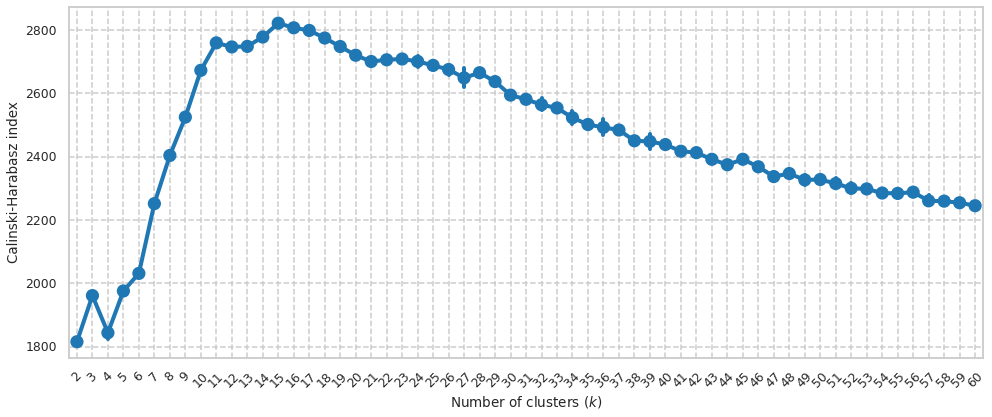

In [41]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [42]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [43]:
parts.head()

n_clusters
2    [[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3    [[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...
5    [[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
dtype: object

In [44]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [45]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [46]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [47]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
11    0.994712
10    0.992874
5     0.983703
7     0.980680
8     0.979489
3     0.977238
9     0.976985
15    0.928311
17    0.909312
12    0.893881
18    0.871414
14    0.868290
24    0.865723
13    0.835805
Name: k, dtype: float64

In [48]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [49]:
parts_ari_df.shape

(59, 10)

In [50]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [51]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
3,0.991686,0.962112,1.000000,0.962112,0.970280,0.991686,0.970280,0.962112,1.0,0.962112
4,1.000000,0.971208,0.593788,0.971208,0.971208,0.593788,0.971208,0.599997,1.0,0.599997
5,0.959258,1.000000,1.000000,1.000000,0.959258,0.959258,0.959258,1.000000,1.0,1.000000
6,0.941504,0.677761,0.957798,0.677761,0.685436,0.983205,0.685436,0.686808,1.0,0.686808


## Save

In [52]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [53]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [54]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [55]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [56]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


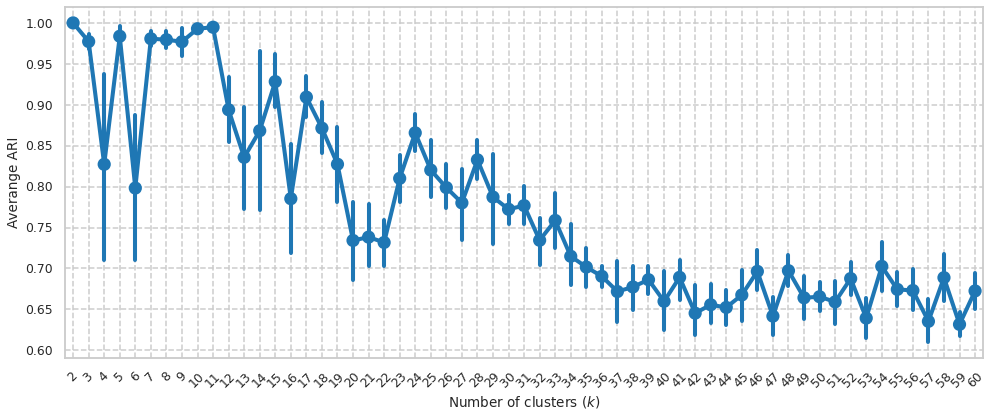

In [57]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()